<h1 align = "center">TSF - Decision Tree Classifier(Iris Dataset)</h1>

## Importing Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pickle

import warnings
warnings.simplefilter("ignore")

## Loading Dataset

In [2]:
data = pd.read_csv('Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.drop(['Id'], axis = 1, inplace=True)

## EDA

In [5]:
data.shape

(150, 5)

In [6]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
data['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

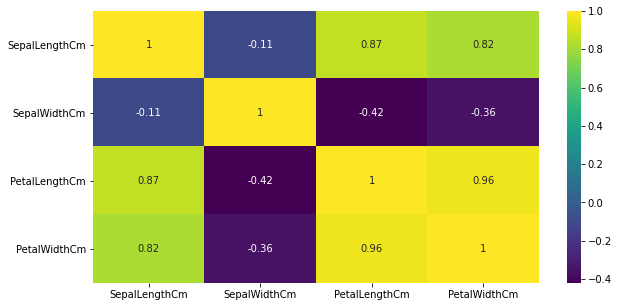

In [12]:
plt.figure(figsize=(10, 5))
sns.heatmap(data.corr(), annot = True, cmap='viridis')

## Splitting the data

In [13]:
X = data.drop(['Species'], axis = 1)
y = data['Species']

In [14]:
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [15]:
print('X train shape: ', X_train.shape)
print('y train shape: ', y_train.shape)
print('X test shape: ', X_test.shape)
print('y test shape: ', y_test.shape)

X train shape:  (105, 4)
y train shape:  (105,)
X test shape:  (45, 4)
y test shape:  (45,)


## Creating the model

In [16]:
clf = DecisionTreeClassifier()

In [17]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Testing the model

In [18]:
prediction = clf.predict(X_test)

In [19]:
acc_score = accuracy_score(y_test, prediction)
print('Accuracy Score: ', round(acc_score,2))

Accuracy Score:  0.96


In [20]:
dict = {
    'Iris-setosa':0,
    'Iris-versicolor':1,
    'Iris-virginica':2,
}

y_true = []
y_pred = []

for val in y_test:
    y_true.append(dict[val])

for val in prediction:
    y_pred.append(dict[val])
    
clf_report = classification_report(y_true, y_pred, target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
print(clf_report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.95      0.95      0.95        20
 Iris-virginica       0.92      0.92      0.92        12

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



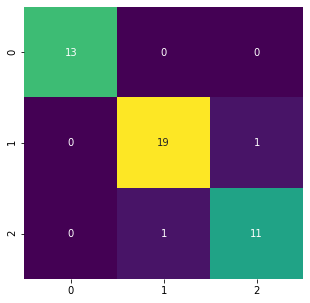

In [21]:
cm = confusion_matrix(y_test, prediction, labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot = True, cmap='viridis', cbar=False)

## Saving the model

In [22]:
filename = 'model.sav'
pickle.dump(clf, open(filename, 'wb'))

## Predicting new data

In [23]:
def predict(data):  ## data should be in this format: [[5.1, 3.5, 1.4, 0.2]]
    model = pickle.load(open('model.sav', 'rb'))
    prediction = model.predict(data)
    print('Prediction is: ', prediction[0])

In [24]:
data = [[5.1, 3.5, 1.4, 0.2]]
predict(data)

Prediction is:  Iris-setosa


## Visualizing the Decision Tree

In [25]:
# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


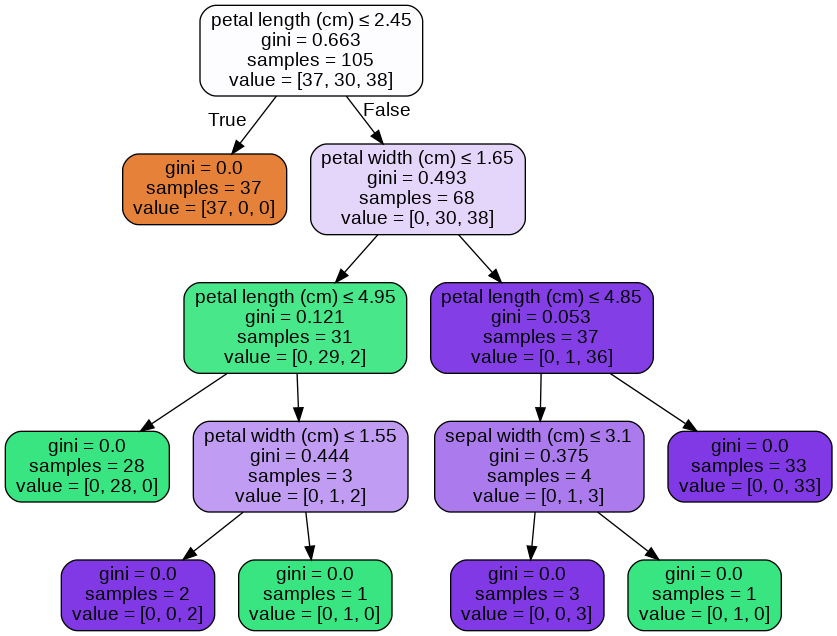

In [26]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, feature_names=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'],  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())